# Kaggle 연동

In [1]:
!pip install kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahjinkim","key":"4516ad969745cd1a304c7a2f58d74e57"}'}

In [3]:
ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Apr 13 04:12 kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Apr 13 04:12 kaggle.json


In [6]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.8MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.51MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 24.6MB/s]


In [7]:
!ls

gender_submission.csv  kaggle.json  sample_data  test.csv  train.csv


# 데이터분석

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

import missingno as msno

plt.style.use("seaborn")
sns.set(font_scale=2)

In [9]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv("test.csv")

In [10]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
for col in df_train.columns:
    msg = "columns: {: >10} \t Percentage of NaN values: {:.2f}%".format(col, 100*df_train[col].isnull().sum()/df_train[col].shape[0])
    print(msg)

columns: PassengerId 	 Percentage of NaN values: 0.00%
columns:   Survived 	 Percentage of NaN values: 0.00%
columns:     Pclass 	 Percentage of NaN values: 0.00%
columns:       Name 	 Percentage of NaN values: 0.00%
columns:        Sex 	 Percentage of NaN values: 0.00%
columns:        Age 	 Percentage of NaN values: 19.87%
columns:      SibSp 	 Percentage of NaN values: 0.00%
columns:      Parch 	 Percentage of NaN values: 0.00%
columns:     Ticket 	 Percentage of NaN values: 0.00%
columns:       Fare 	 Percentage of NaN values: 0.00%
columns:      Cabin 	 Percentage of NaN values: 77.10%
columns:   Embarked 	 Percentage of NaN values: 0.22%


In [15]:
for col in df_test.columns:
    msg = "columns: {: >10} \t Percentage of NaN values: {:.2f}%".format(col, 100*df_test[col].isnull().sum()/df_test[col].shape[0])
    print(msg)

columns: PassengerId 	 Percentage of NaN values: 0.00%
columns:     Pclass 	 Percentage of NaN values: 0.00%
columns:       Name 	 Percentage of NaN values: 0.00%
columns:        Sex 	 Percentage of NaN values: 0.00%
columns:        Age 	 Percentage of NaN values: 20.57%
columns:      SibSp 	 Percentage of NaN values: 0.00%
columns:      Parch 	 Percentage of NaN values: 0.00%
columns:     Ticket 	 Percentage of NaN values: 0.00%
columns:       Fare 	 Percentage of NaN values: 0.24%
columns:      Cabin 	 Percentage of NaN values: 78.23%
columns:   Embarked 	 Percentage of NaN values: 0.00%


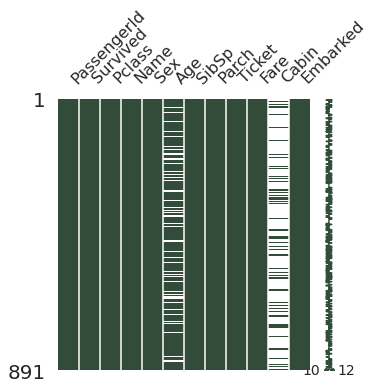

In [16]:
msno.matrix(df_train, figsize=(5, 5), color=(0.2, 0.3, 0.23))

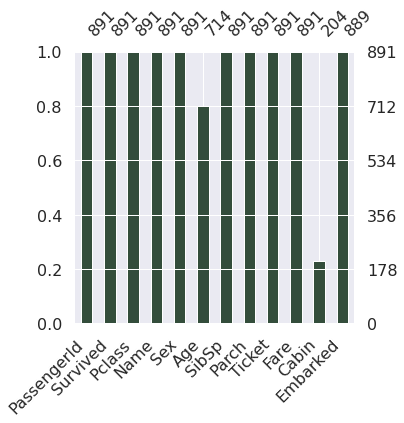

In [17]:
msno.bar(df_train, figsize=(5, 5), color=(0.2, 0.3, 0.23))

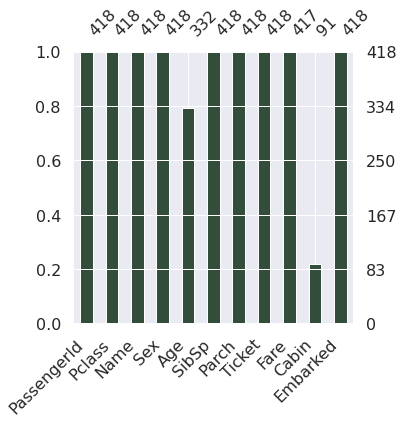

In [18]:
msno.bar(df_test, figsize=(5, 5), color=(0.2, 0.3, 0.23))

## target label 분포 확인하기

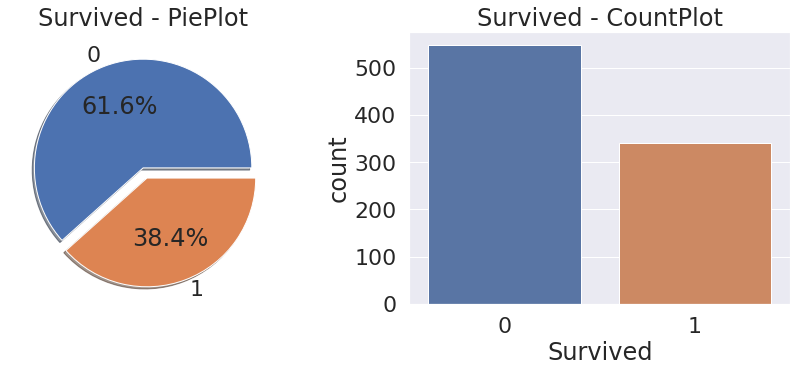

In [19]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

df_train['Survived'].value_counts().plot.pie(explode=(0, 0.1),
                                             autopct='%1.1f%%',
                                             shadow=True,
                                             ax=ax[0])
ax[0].set_title("Survived - PiePlot")
ax[0].set_ylabel("")

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title("Survived - CountPlot")

plt.show()

# EDA

### pclass

In [20]:
df_train[['Pclass', 'Survived']].groupby('Pclass', as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [21]:
df_train[['Pclass', 'Survived']].groupby('Pclass', as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [22]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient("cool")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


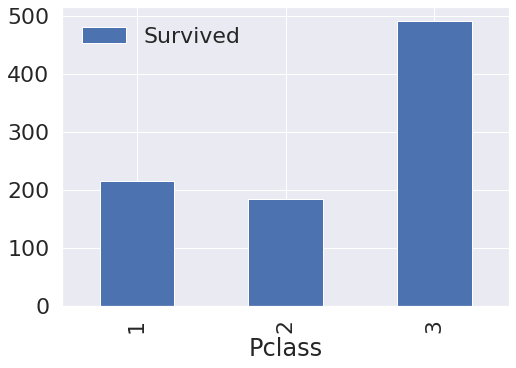

In [23]:
df_train[['Pclass', 'Survived']].groupby('Pclass', as_index=True).count().plot.bar()

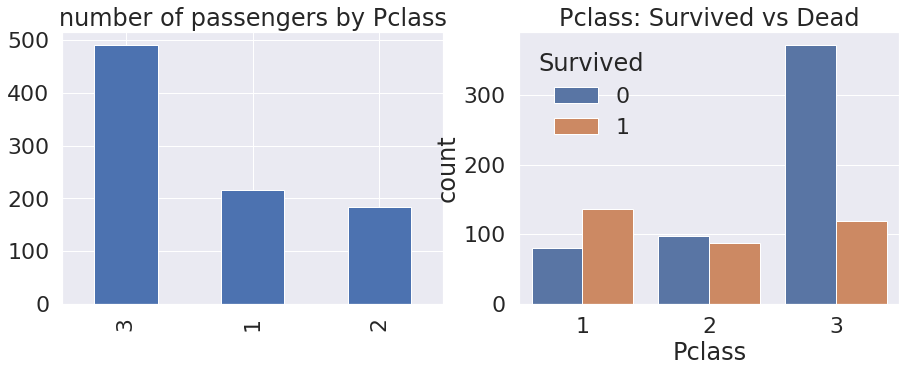

In [24]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("number of passengers by Pclass")

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title("Pclass: Survived vs Dead")

plt.show()

## sex

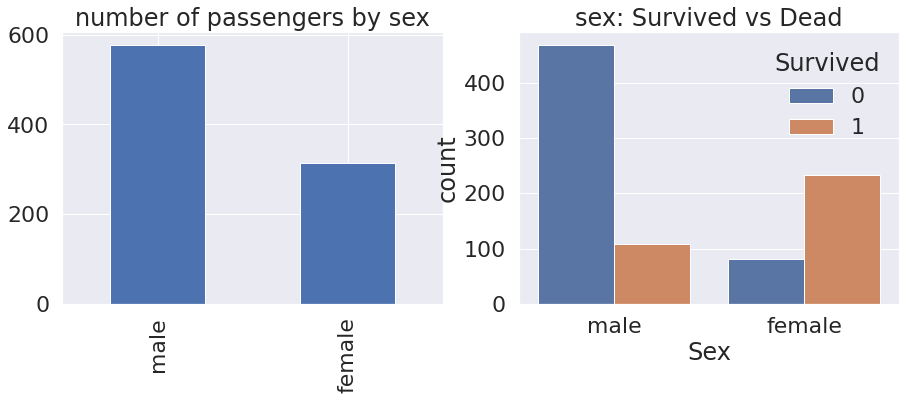

In [25]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

df_train['Sex'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("number of passengers by sex")

sns.countplot('Sex', hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title("sex: Survived vs Dead")

plt.show()

In [26]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient("cool")

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


=> **Female이 생존률이 높다**

## pclass + sex

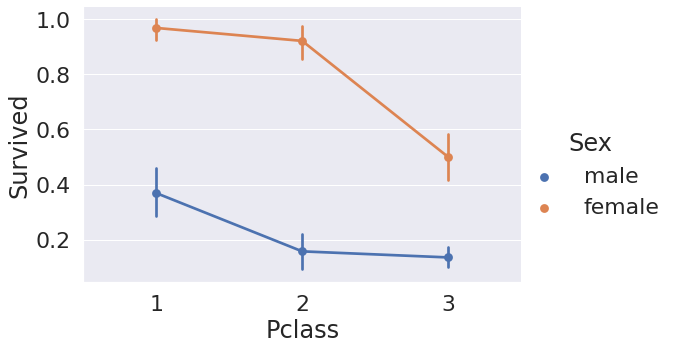

In [27]:
sns.factorplot("Pclass", "Survived", hue="Sex", data=df_train, size=5, aspect=1.5)

In [28]:
# 그래프 비교: hue vs col
# sns.factorplot('Sex', 'Survived', col='Pclass', data=df_train)

## age

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

feature 'Age': 
1. numeric 
2. null값 존재
3. Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 
4. 최고령 80세, 최연소 0.4세, 평균 29.6세 

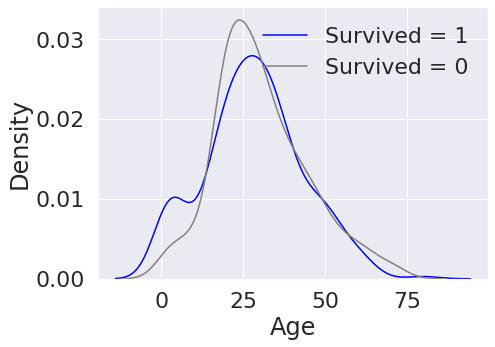

In [31]:
plt.figure(figsize=(7, 5))

sns.kdeplot(df_train[df_train['Survived']==1]['Age'], color='blue')
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], color='gray')

plt.legend(['Survived = 1', 'Survived = 0'])

plt.show()

In [32]:
# # class별 age 분포 확인 
# plt.figure(figsize=(7, 5))

# df_train['Age'][df_train['Pclass']==1].plot(kind="kde")
# df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
# df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

# plt.xlabel('age')
# plt.ylabel("")
# plt.title("age distribution by Pclass")
# plt.legend(['1st', '2nd', '3rd'])

# plt.show()

Text(0.5, 0, 'age range')

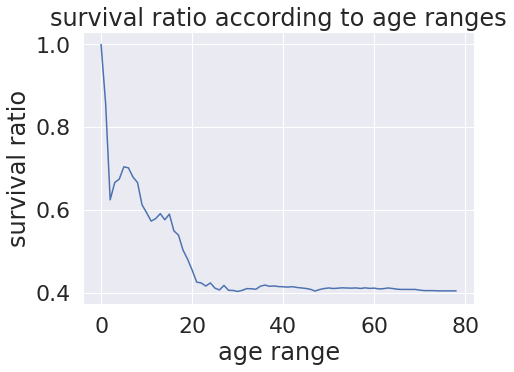

In [33]:
# 나이가 어릴수록 생존률이 높은 것이 맞는지 나이범위별로 생존률 변화를 알아본다. 
survival_ratio_according_to_age_ranges = []
for i in range(1, 80):
    survival_ratio_according_to_age_ranges.append(df_train[df_train['Age'] < i]['Survived'].sum()/len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 5))
plt.plot(survival_ratio_according_to_age_ranges)
plt.title("survival ratio according to age ranges")
plt.ylabel("survival ratio")
plt.xlabel("age range")

=> **나이가 어릴수록 생존률이 높다**

## pclass + age, sex + age

Text(0.5, 1.0, 'Sex + Age vs Survived')

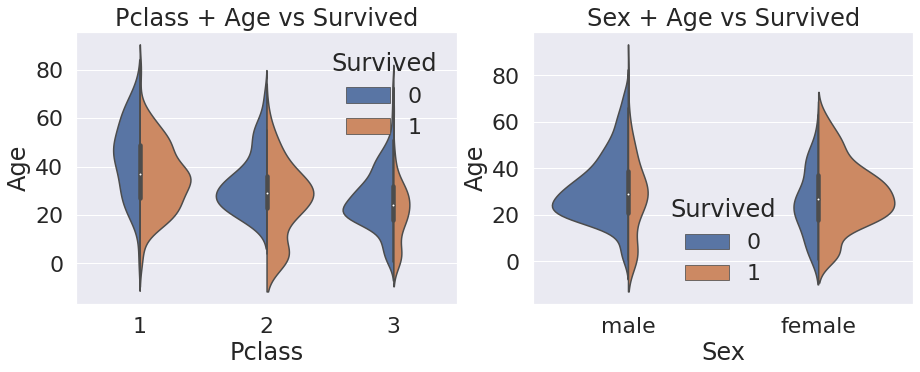

In [34]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, 
               split=True, scale='count', ax=ax[0])
ax[0].set_title("Pclass + Age vs Survived")

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, 
               split=True, scale='count', ax=ax[1])
ax[1].set_title("Sex + Age vs Survived")

## embarked

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls